# Google Trends data download

In [1]:
import pandas as pd
from pytrends.request import TrendReq ###HAD TO FIDDLE THE PACKAGE CODE
from datetime import datetime, date, timedelta
import sys
import numpy as np
import unidecode
import pickle
from time import sleep
import matplotlib.pyplot as plt

In [2]:
datetime(2020,8,31) - datetime(2019,12,6)

datetime.timedelta(days=269)

In [3]:
start_day = "2019-12-06"
end_day = "2020-08-31"
timeframe_lst = [' '.join((start_day, end_day))]
timeframe = timeframe_lst[0]
timeframe

'2019-12-06 2020-08-31'

In [4]:
pytrend = TrendReq(tz=0, timeout=(10,25), retries=2, backoff_factor=0.1)

In [6]:
def collect_interest_over_time(lst_query,
                               added_lab='',
                               timeframe=timeframe,
                               country_iso='IT'):
    pickle_filename = country_iso + timeframe + '_' + '_'.join(lst_query) + added_lab
    print(pickle_filename)
    try:
        with open('./data/searches_news/'+pickle_filename+'.pkl', 'rb') as f:
            res_all = pickle.load(f)
        print('Already downloaded')
        return res_all
    except FileNotFoundError:
        try:
            pytrend.build_payload(lst_query, geo=country_iso, timeframe=timeframe)
            data = pytrend.interest_over_time()
            res_all = {country_iso: {timeframe: data}}
            print("Downloaded!")
            with open('./data/searches_news/'+pickle_filename+'.pkl', 'wb') as f:
                pickle.dump(res_all, f)
            return res_all
        except:
            print("Unexpected error:", sys.exc_info()[0])
    return None

In [7]:
####LIST OF QUERIES TO BE SEARCHED SEPARATELY
lst_queries = [
    'coronavirus',
    'sanremo',
    'elezioni', 'regionali',
    'calcio', 'campionato', 'champions', 'serie a',
    'eurovision',
    'morricone',
    'meteo',
    'papa francesco', 'papa',
    'beirut',
    'viviana parisi', 'gioele', 'viviana',
    'ps5', 'playstation',
    'lotto',
    'roma',
    'sondaggi',
]

added_lab = ''
country_iso = 'IT'
timeframe = timeframe_lst[0]

for query in lst_queries:
    collect_interest_over_time([query,], added_lab=added_lab, timeframe=timeframe, country_iso=country_iso)

IT2019-12-06 2020-08-31_coronavirus
Already downloaded
IT2019-12-06 2020-08-31_sanremo
Already downloaded
IT2019-12-06 2020-08-31_elezioni
Already downloaded
IT2019-12-06 2020-08-31_regionali
Already downloaded
IT2019-12-06 2020-08-31_calcio
Already downloaded
IT2019-12-06 2020-08-31_campionato
Already downloaded
IT2019-12-06 2020-08-31_champions
Already downloaded
IT2019-12-06 2020-08-31_serie a
Already downloaded
IT2019-12-06 2020-08-31_eurovision
Already downloaded
IT2019-12-06 2020-08-31_morricone
Already downloaded
IT2019-12-06 2020-08-31_meteo
Already downloaded
IT2019-12-06 2020-08-31_papa francesco
Already downloaded
IT2019-12-06 2020-08-31_papa
Already downloaded
IT2019-12-06 2020-08-31_beirut
Already downloaded
IT2019-12-06 2020-08-31_viviana parisi
Already downloaded
IT2019-12-06 2020-08-31_gioele
Already downloaded
IT2019-12-06 2020-08-31_viviana
Already downloaded
IT2019-12-06 2020-08-31_ps5
Already downloaded
IT2019-12-06 2020-08-31_playstation
Already downloaded
IT2019-1

In [8]:
lst_series = []
for query in lst_queries:
    lst_query = [query]
    added_lab = ''
    pickle_filename = country_iso + timeframe + '_' + '_'.join(lst_query) + added_lab
    with open('./data/searches_news/'+pickle_filename+'.pkl', 'rb') as f:
        res_all = pickle.load(f)
    lst_series.append(res_all[country_iso][timeframe].iloc[:,[0]])

,coronavirus,sanremo,elezioni,regionali,calcio,campionato,champions,serie a,eurovision,morricone,...,papa,beirut,viviana parisi,gioele,viviana,ps5,playstation,lotto,roma,sondaggi
date,,,,,,,,,,,,,,,,,,,,,
2019-12-06,0,0,1,1,40,24,3,19,0,0,...,5,0,0,0,1,1,16,41,100,15
2019-12-07,0,1,1,1,67,61,4,56,0,0,...,6,0,0,0,1,1,18,80,73,14
2019-12-08,0,1,1,1,97,70,6,70,1,0,...,8,0,0,0,1,2,17,45,59,24
2019-12-09,0,0,1,1,40,18,11,11,1,0,...,9,0,0,0,1,1,18,30,62,19
2019-12-10,0,0,1,1,43,12,87,5,0,0,...,6,0,0,0,1,1,18,60,58,19


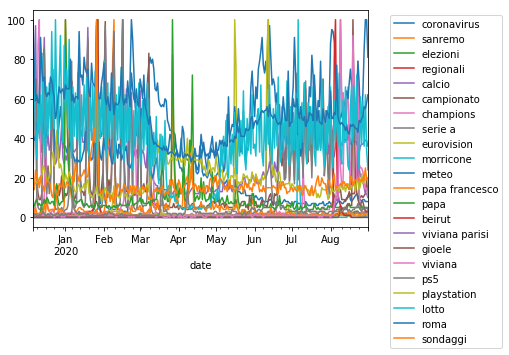

In [9]:
df = pd.concat(lst_series, axis=1)
df.to_csv('./data/searches_news/interest_over_time_sep_queries.csv')
df.plot.line()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
df.head()

In [10]:
def collect_related_queries(query,
                            added_lab='rq',
                            timeframe=timeframe,
                            country_iso='IT'):
    pickle_filename = country_iso + timeframe + '_' + query + added_lab
    print(pickle_filename)
    try:
        with open('./data/searches_news/'+pickle_filename+'.pkl', 'rb') as f:
            res_all = pickle.load(f)
        print('Already downloaded')
        return res_all
    except FileNotFoundError:
        try:
            pytrend.build_payload([query], geo=country_iso, timeframe=timeframe)
            data = pytrend.related_queries()
            res_all = {country_iso: {timeframe: data}}
            print("Downloaded!")
            with open('./data/searches_news/'+pickle_filename+'.pkl', 'wb') as f:
                pickle.dump(res_all, f)
            return res_all
        except:
            print("Unexpected error:", sys.exc_info()[0])
    return None

In [11]:
####LIST OF QUERIES TO BE SEARCHED FOR RELATED QUERIES
lst_queries_rq = [
    'coronavirus',
]

added_lab = 'rq'
country_iso = 'IT'
timeframe = timeframe_lst[0]

for query in lst_queries_rq:
    #retrive list related queries
    res_rq = collect_related_queries(query, added_lab=added_lab, timeframe=timeframe, country_iso=country_iso)
    lst_rel_queries = res_rq[country_iso][timeframe][query]['top']['query'].to_list()
    print(lst_rel_queries)
    ###2 by 2 comparison for scaling
    res_2b2 = collect_interest_over_time([query, lst_rel_queries[0]],
                                         added_lab='2by2',
                                         timeframe=timeframe,
                                         country_iso=country_iso)
    scaling_param = [np.divide(*res_2b2[country_iso][timeframe].iloc[:,[0,1]].max().values[::-1])]
    for k in range(len(lst_rel_queries)-1):
        res_2b2 = collect_interest_over_time([lst_rel_queries[k], lst_rel_queries[k+1]],
                                             added_lab='2by2',
                                             timeframe=timeframe,
                                             country_iso=country_iso)
        scaling_param.append(np.divide(*res_2b2[country_iso][timeframe].iloc[:,[0,1]].max().values[::-1]))
    scaling_param = np.cumprod(scaling_param)
    ###retrive insterest of each related query and scale it
    lst_series = []
    for scale,rq_query in zip(scaling_param,lst_rel_queries):
        res_rq = collect_interest_over_time([rq_query,], added_lab='',
                                         timeframe=timeframe, country_iso=country_iso)
        lst_series.append(res_rq[country_iso][timeframe].iloc[:,[0]] * scale)
    df_rq = pd.concat(lst_series, axis=1)
    df_rq.to_csv('./data/searches_news/'+query+'_rq.csv')

IT2019-12-06 2020-08-31_coronavirusrq
Already downloaded
['italia coronavirus', 'coronavirus oggi', 'coronavirus news', 'coronavirus notizie', 'ultime coronavirus', 'ultime notizie coronavirus', 'lombardia coronavirus', 'corona', 'sintomi coronavirus', 'contagi coronavirus', 'coronavirus contagi', 'coronavirus in italia', 'casi coronavirus', 'morti coronavirus', 'bollettino coronavirus', 'roma coronavirus', 'dati coronavirus', 'coronavirus mondo', 'mappa coronavirus', 'coronavirus sicilia', 'veneto coronavirus', 'campania coronavirus', 'decreto coronavirus', 'coronavirus milano', 'coronavirus piemonte']
IT2019-12-06 2020-08-31_coronavirus_italia coronavirus2by2
Already downloaded
IT2019-12-06 2020-08-31_italia coronavirus_coronavirus oggi2by2
Already downloaded
IT2019-12-06 2020-08-31_coronavirus oggi_coronavirus news2by2
Already downloaded
IT2019-12-06 2020-08-31_coronavirus news_coronavirus notizie2by2
Already downloaded
IT2019-12-06 2020-08-31_coronavirus notizie_ultime coronavirus2

In [34]:
###Manual aggregation of related queries
df_rq = pd.read_csv('./data/searches_news/'+query+'_rq.csv', index_col=0)
df_rq.insert(
    0, column='news', 
    value=df_rq.loc[:, ['coronavirus oggi', 'coronavirus news', 'coronavirus notizie',
                        'ultime coronavirus', 'ultime notizie coronavirus']].sum(axis=1)
)
#RM useless columns
lst_cols_rm = ['corona', 'coronavirus contagi', 'coronavirus in italia',
               'coronavirus oggi', 'coronavirus news', 'coronavirus notizie',
               'ultime coronavirus', 'ultime notizie coronavirus']
df_rq = df_rq.iloc[:,~df_rq.columns.isin(lst_cols_rm)]    
#RM coronavirus
df_rq = df_rq.rename(columns=lambda x: 'S_'+' '.join([w for w in x.split() if w != 'coronavirus']))
df_rq.to_csv('./data/searches_news/'+query+'_rq.csv')
df_rq

,S_news,S_italia,S_lombardia,S_sintomi,S_contagi,S_casi,S_morti,S_bollettino,S_roma,S_dati,S_mondo,S_mappa,S_sicilia,S_veneto,S_campania,S_decreto,S_milano,S_piemonte
date,,,,,,,,,,,,,,,,,,
2019-12-06,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2019-12-07,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2019-12-08,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2019-12-09,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2019-12-10,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,2.553459,1.17,0.211686,0.098787,0.316118,0.255604,0.075659,0.342167,0.165298,0.253457,0.183664,0.076527,0.225754,0.141096,0.249458,0.0,0.050392,0.119932
2020-08-28,2.390074,1.30,0.211686,0.131716,0.273969,0.230044,0.113488,0.367512,0.202031,0.264477,0.208153,0.076527,0.169316,0.112877,0.205436,0.0,0.100783,0.119932
2020-08-29,2.346133,1.17,0.169349,0.098787,0.252895,0.204483,0.075659,0.342167,0.202031,0.275497,0.183664,0.076527,0.191891,0.141096,0.249458,0.0,0.050392,0.119932


,S_news,S_italia,S_lombardia,S_sintomi,S_contagi,S_casi,S_morti,S_bollettino,S_roma,S_dati,S_mondo,S_mappa,S_sicilia,S_veneto,S_campania,S_decreto,S_milano,S_piemonte
date,,,,,,,,,,,,,,,,,,
2019-12-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


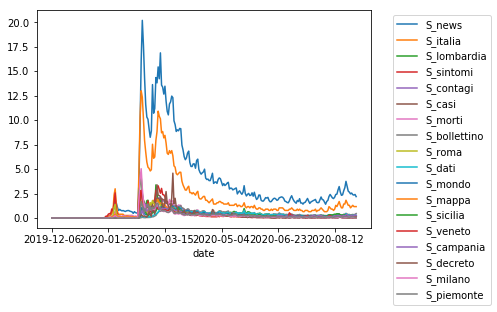

In [33]:
df_rq.plot.line()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
df_rq.head()